# Binary Classification Model - Resident IsFall detection from description
## Description

What we cover, Building an understanding of machine learning algorithms
Using pandas, NumPy, and Matplotlib to read in, process, and visualize data
Implementing linear classifiers for 2 class problems , refers to binary classification, where the goal is to classify instances into one of two possible classes
Explain binary classification model



my vision for this fall stuff, is build out activity before fall, location of fall, time of fall, i want to detect when a resident is more likely to fall. make them safer

gpt 4-0 chat https://chatgpt.com/c/66f8c165-afdc-8000-8a59-4d07b8172456




### Install required packages

In [32]:
!pip3 install psutil # the ! sign in a notebook cell lets us run terminal comands from within jupyter notebook
!pip3 install numpy
!pip3 install pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


### Vectorize the Fall datase

- We will learn about pandas and vectors here, arrays with quantative data aka meaning to machines, just like arrays of qualativative data that have meaning to us

- pandas data manipulation and analysis library, just like datasets in c#, DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. which is DataSet in c# ....... Series is a DataTable,, Datasets hold multiple DataTables 

In [43]:
import pandas as pd

class DataCleaner:
    def __init__(self, df):
        self.df = df
    
    def clean_data(self):
  #      print("First few rows of the dataset:")
  #      print(self.df.head())

        # Get a count of rows with missing data
        missing_data_count = self.df.isnull().sum()  # the isnull().sum() will show the data type of the counts
        print("\nCount of missing data in each column:")
        print(missing_data_count)

        # Get the total number of rows with any missing data
        rows_with_missing_data = self.df.isnull().any(axis=1).sum()
        print(f"\nTotal number of rows with missing data: {rows_with_missing_data}")

        # Drop rows with any missing data
        df_cleaned = self.df.dropna()

        # Display the first few rows of the cleaned DataFrame to verify looks good high level overview
        print("\nFirst few rows of the cleaned dataset:")
        print(df_cleaned.head())

        return df_cleaned

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from __main__ import DataCleaner  # Import the DataCleaner class

# Load the dataset
df = pd.read_csv("data/fall_data_v1.csv") # this is a 2 features dataset, 2 colunmns in dataset

# Clean the dataset
data_cleaner = DataCleaner(df)
df_cleaned = data_cleaner.clean_data()  # Returns the cleaned DataFrame

# Check if the DataFrame was cleaned successfully
print(f"\nDataset after cleaning: {df_cleaned.shape[0]} rows, {df_cleaned.shape[1]} columns")

# Step 1: Vectorize the text descriptions using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X = vectorizer.fit_transform(df_cleaned['Description'])  # Use cleaned data

# Step 2: Define the target variable
y = df_cleaned['isFallFlg']  # Use cleaned data

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Check the shape of the transformed data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")





Count of missing data in each column:
Description    2
isFallFlg      0
dtype: int64

Total number of rows with missing data: 2

First few rows of the cleaned dataset:
                                         Description  isFallFlg
0                    Testing an incident submission.          1
1                                               test          0
2           Melanie fell from her bed this morning.           1
3  Pam was found on the floor of her unit; reside...          1
4                                              Test3          1

Dataset after cleaning: 16967 rows, 2 columns
Training data shape: (13573, 5000)
Testing data shape: (3394, 5000)


### Helper Classes

In [6]:
import psutil

class HardwareMonitor:
    def __init__(self):
        self.num_cpus = psutil.cpu_count()
        self.cpu_freq = psutil.cpu_freq().current
        self.total_memory = psutil.virtual_memory().total / (1024 ** 3)  # Convert bytes to GB
        self.available_memory = psutil.virtual_memory().available / (1024 ** 3)  # Convert bytes to GB

    def display_hardware_info(self):
        print(f"Number of CPUs: {self.num_cpus}")
        print(f"CPU Frequency: {self.cpu_freq} MHz")
        print(f"Total Memory: {self.total_memory:.2f} GB")
        print(f"Available Memory: {self.available_memory:.2f} GB")

if __name__ == "__main__":
    monitor = HardwareMonitor()
    monitor.display_hardware_info()

Number of CPUs: 8
CPU Frequency: 3204 MHz
Total Memory: 8.00 GB
Available Memory: 1.23 GB


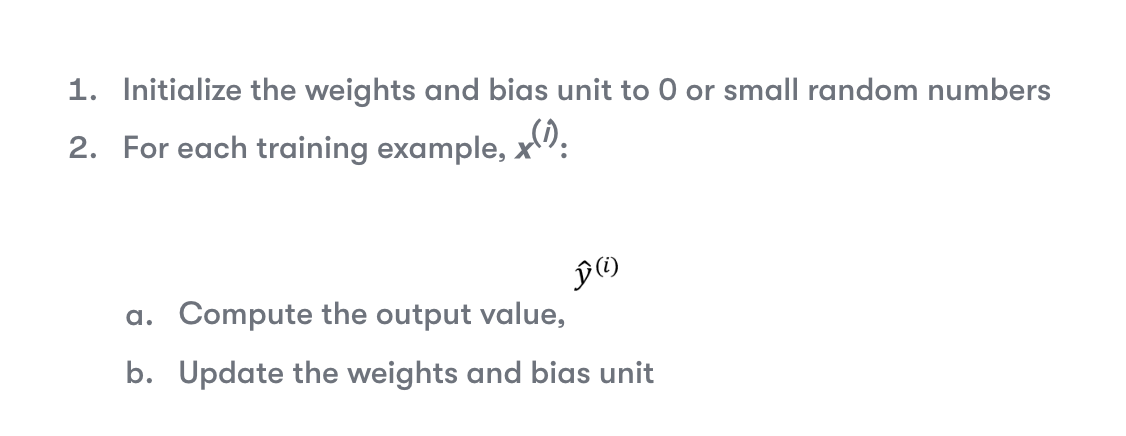

In [15]:
from IPython.display import Image
Image(filename='./images/theperceptronlearningrule.png', width=500) 

## Object-oriented perceptron API

We take an object-oriented approach to defiining the perceptron class

The Perceptron Learning Rules, mimics how a single neuron in the brain works: either it fires or it doesn't.
it follows these steps: 

In [16]:
import numpy as np # arrays and matrices(matrix aka 2 dimensional array of numbers arranged in rows and columns, linear algebra) , show example of matrix table

class Perceptron:
    # here we will define the parameters aka features aka variables aka attributes of the perceptron model
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # eta is the learning rate, between (0.0 and 1.0) , (n) in the equation, is the crutial parameter that determines the step size at each iteration while moving toward a minimum of the cost function while movting toward a minimum of the loss function.
        self.n_iter = n_iter  # Number of complete passes over the training dataset (epochs)
        self.random_state = random_state # random number generator seed for random weight initialization
    
    def fit(self, X, y):
        # Random number generator with the provided random seed
        rgen = np.random.RandomState(self.random_state)

        # Initialize weights (w_)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # weights to a vector aka array
        print("Initial Weights Before Training:")
        print("Weight of first feature (variable):", self.w_[0])
        print("Weight of second feature (variable):", self.w_[1])

        self.b_ = np.float64(0.) # set to initial value of 0 # we apply the underscore(_) to attributes that are not created upon the initialization of the object
        
        self.errors_ = [] # List to collect errors in each epoch
        
        # Training loop over the number of epochs (n_iter)
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # Calculate the weight update based on the prediction error
                update = self.eta * (target - self.predict(xi))
                # Update weights and bias
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0) # Update weights and bias
            self.errors_.append(errors) # Record the number of errors in each epoch
        return self
    
    def net_input(self, X):
        """Calculate net input (linear combination of weights and inputs + bias)"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after applying the unit step function (threshold)"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    # Example dataset (AND logic gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # this is the training dataset
y = np.array([0, 0, 0, 1])

# Instantiate and train the Perceptron model
perceptron = Perceptron(eta=0.1, n_iter=10, random_state=1)
perceptron.fit(X, y)

# Display final weights and bias after training
print("Final Weights After 10 Epochs of Training:", perceptron.w_)
print("Bias: ", perceptron.b_) # The bias helps to shift the decision boundary, allowing the perceptron to separate the data even when all input features are zero, these get updated during the training process

# Example of predicting on the training set
predictions = perceptron.predict(X)
print("Predictions:", predictions) # These are the predicted outputs of the perceptron after training on the dataset 



[ 0.01624345 -0.00611756]
Intial Random Weights: [0.11624345 0.09388244]
Bias: -0.2
Predictions: [0 0 0 1]
Matrix Example:
[[0 1]
 [2 3]
 [4 5]]


In [17]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

In [ ]:
# Numpy Example Chance: Display the matrix (example) with headers, tihs a random example, include this?
matrix_example = np.array([[0, 1], [2, 3], [4, 5]])  # Just an example matrix
print("Matrix Example:")
print(matrix_example)

### this fetches data from url and using panads, 


I want to talk about Discrete and Continous Data from card . Numeric data can either be 

In [ ]:
import requests # HTTP library for making requests to URLs, just like WebClient in c#
import pandas as pd # data manipulation and analysis library, just like datasets in c#, DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. which is DataSet in c# ....... Series is a DataTable,, Datasets hold multiple DataTables 

class DataFetcher:
    def __init__(self, url):
        self.url = url
        self.data = None

    def fetch_data(self):
        response = requests.get(self.url)
        response.raise_for_status()  # Raise an error for bad status codes
        self.data = response.content

    def to_dataframe(self, delimiter=','):
        if self.data is None:
            raise ValueError("No data fetched. Call fetch_data() first.")
        from io import StringIO
        data_str = StringIO(self.data.decode('utf-8'))
        df = pd.read_csv(data_str, delimiter=delimiter)
        return df

# Example usage
url = 'https://example.com/data.csv'
fetcher = DataFetcher(url)
fetcher.fetch_data()
df = fetcher.to_dataframe()
print(df.head())

## I want to output the data and clean it using python
## maybe use panda data frames